In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [53]:
#Loading the datasets
df_historic = pd.read_csv('historic.csv')
df_prediction = pd.read_csv('prediction_input.csv')

In [54]:
#display first few rows of dataset
df_historic.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [55]:
#summary stats
df_historic.describe()

,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


In [56]:
#Check for null values in data
df_historic.isnull().sum()

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

In [57]:
# Check the data type of the "stars" column
stars_dtype = df_historic['stars'].dtype

# Check if the data type is numeric (either int or float)
is_numeric = stars_dtype in [np.int64, np.float64]

# Print the result
if is_numeric:
    print("The 'stars' column is numeric.")
else:
    print("The 'stars' column is not numeric.")

The 'stars' column is numeric.


# **EDA**

<Axes: xlabel='success_indicator', ylabel='stars'>

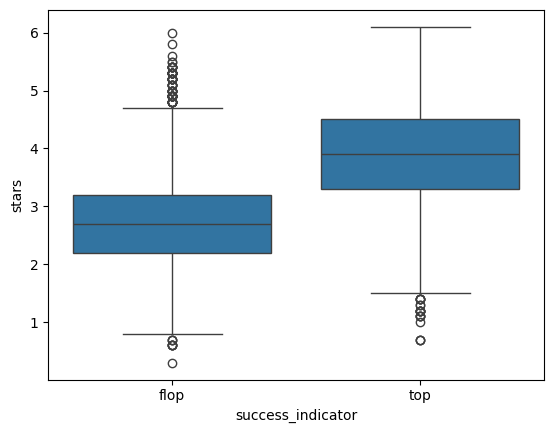

In [58]:
sns.boxplot(data=df_historic, x='success_indicator', y='stars')

This shows top items have a higher average star rating compared to flop items.

In [59]:
print(df_historic['stars'].describe())

count    8000.000000
mean        3.473075
std         0.978810
min         0.300000
25%         2.800000
50%         3.500000
75%         4.200000
max         6.100000
Name: stars, dtype: float64


<Axes: xlabel='stars', ylabel='Count'>

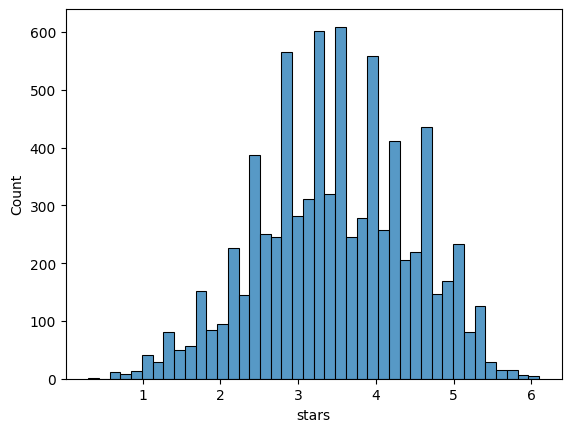

In [60]:
sns.histplot(data=df_historic, x='stars')

We can observe most ratings ranges between 2.5 and 4.5

**Categories**

In [61]:
ct = pd.crosstab(df_historic['category'], df_historic['success_indicator'])
ct_pct = ct.div(ct.sum(1), axis=0) * 100

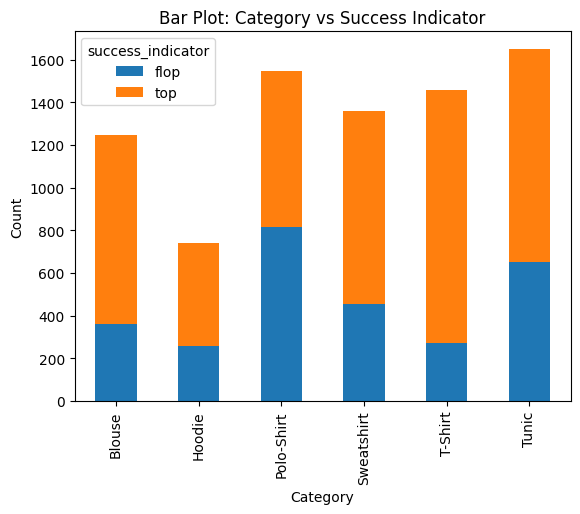

In [62]:
cross_tab = pd.crosstab(df_historic['category'], df_historic['success_indicator'])

cross_tab.plot.bar(stacked=True) # will plot the stacked bar plot

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot: Category vs Success Indicator')
plt.show()

By considering the above barplot, we can say that T-shirt has the top success rate in all categories followed by blouse.
Whereas Polo-Shirt has the highest flop percentage.

**Main Promoters**

In [20]:
ct = pd.crosstab(df_historic['main_promotion'], df_historic['success_indicator'])
ct_pct = ct.div(ct.sum(1), axis=0) * 100

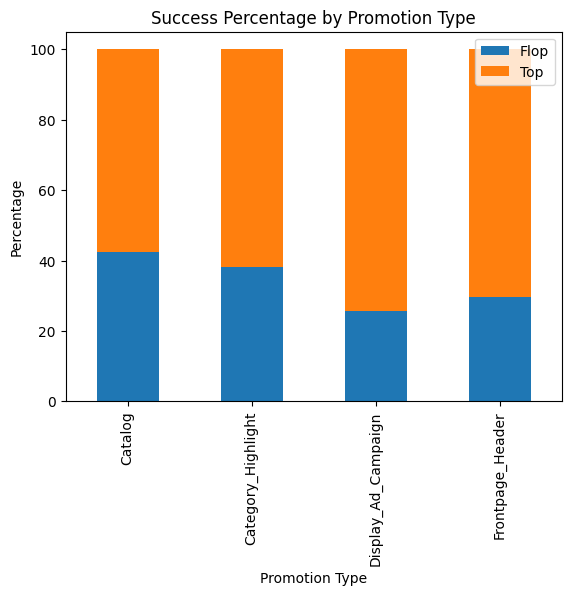

In [21]:
ct_pct.plot(kind='bar', stacked=True)

plt.title('Success Percentage by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Percentage')
plt.legend(labels=['Flop', 'Top'])

plt.show()

Display_Ad_Campaign has the most impact on sales followed by Frontpage_Header.

**Colors**

In [23]:
#crosstab of main_promotion vs success_indicator
ct = pd.crosstab(df_historic['color'], df_historic['success_indicator'])
ct_pct = ct.div(ct.sum(1), axis=0) * 100

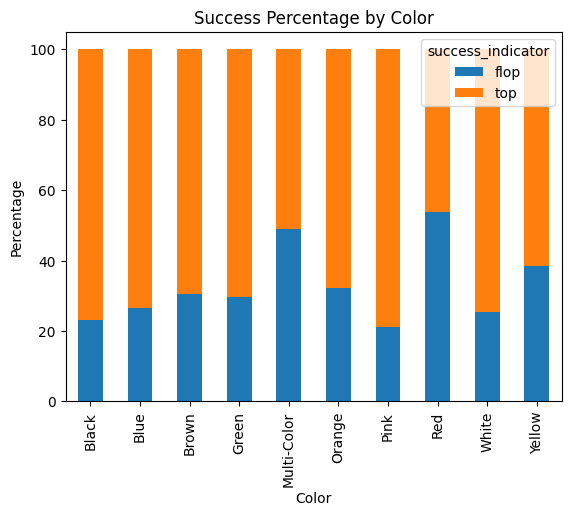

In [24]:
ct_pct.plot(kind='bar', stacked=True)

plt.title("Success Percentage by Color")
plt.xlabel("Color")
plt.ylabel("Percentage")

plt.show()

Here we can see that Black and Pink colour products are top successers whereas Red has the highest flops.

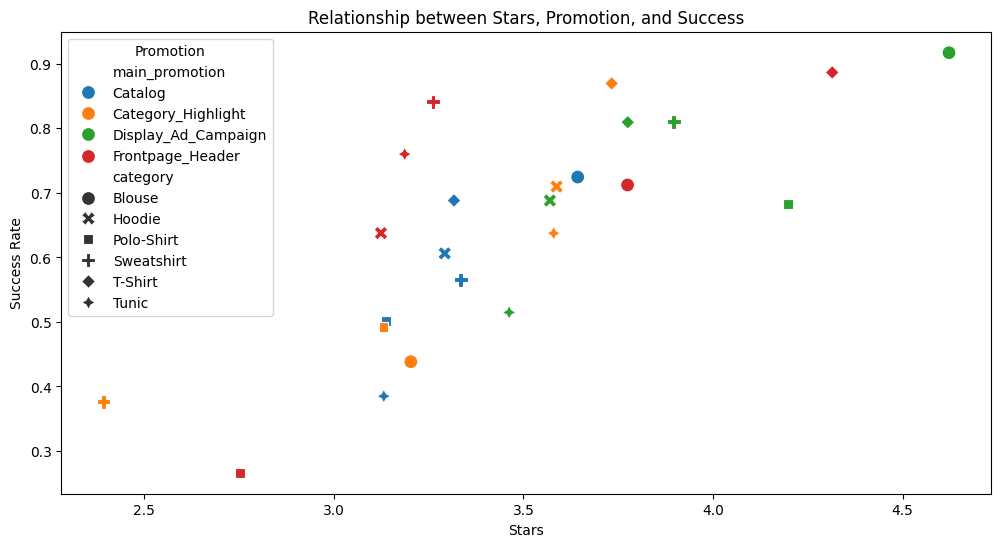

In [34]:
# Grouping and Aggregation
grouped_data = df_historic.groupby(['main_promotion', 'category']).agg({'stars': 'mean', 'success_indicator': 'mean'}).reset_index()

# Visualization with different symbols for the "category" column
plt.figure(figsize=(12, 6))
sns.scatterplot(x='stars', y='success_indicator', hue='main_promotion', style='category', data=grouped_data, s=100)
plt.title('Relationship between Stars, Promotion, and Success')
plt.xlabel('Stars')
plt.ylabel('Success Rate')
plt.legend(title='Promotion')
plt.show()



Scatterplot representing the combination of main_promotion, category, stars and success rate to gain insight of which combination would fit the best